### Домашнее задание по sklearn

В следующей ячейке мы импортируем библиотеки и фиксируем случайность. Значение сида(seed), а в нашем случае, 42, фиксирует случайность. Что это значит? 

После написания такой строчки, операции из ```numpy```, например, генерация датасета, будут все еще случайными,
но для всех запускающих этот код -- одинаковыми.

Пожалуйста, обращайте на него внимание во всех заданиях. Это требуется для проверки ваших решений и его удаление или изменение может повлечь за собой ошибки.

In [1]:
import sklearn
import numpy as np

np.random.seed(42)

# Задание 1

1. Получите выборку с помощью следующего вызова:
```
sklearn.datasets.make_moons(n_samples=1000, noise=0.5, random_state=10)
```
2. Разбейте выборку на `train` и `test` с помощью функции `train_test_split`. Через аргументы функции зафиксируйте `random_state=10` и `test_size=0.5`.

3. Обучите класс `GridSearchCV` на обучающей выборке. Переберите параметр `n_neighbors` от 1 до 20. Чтобы получить детерменированный результат, передайте в параметр `cv` объект класса `KFold(n_splits=5, random_state=10)`. Этот класс будет отвечать за разбиение выборки во время кросс-валидации.

Отправьте значение доли верных ответов(`accuracy`), которое получается, если применить обученный `GridSearchCV` к тестовой выбоке.

In [2]:
# your code here
from sklearn.model_selection import train_test_split, GridSearchCV, KFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.datasets import make_moons

dataset = make_moons(n_samples=1000, noise=.5, random_state=10)
x_train, x_test, y_train, y_test = train_test_split(dataset[0], dataset[1], test_size=.5, random_state=10)
gs = GridSearchCV(KNeighborsClassifier(),
                  param_grid={'n_neighbors' : range(1,20)},
                  cv=KFold(n_splits=5, random_state=10, shuffle=True))
gs.fit(x_train, y_train)
accuracy = accuracy_score(y_test, gs.predict(x_test))

# your code here


In [3]:
# Небольшая проверка для себя
# В таких блоках мы сравниваем хэш вашего ответа и верного. 
# Таким образом вы поймете, правильный ли ваш ответ на данное задание

# Если ничего не вывелось, то ответ верный. Если ошибка, то проверьте это задание.
import hashlib

assert hashlib.sha256(str(round(accuracy, 2)).encode()).hexdigest() == '1e9d7c27c8bbc8ddf0055c93e064a62fa995d177fee28cc8fa949bc8a4db06f4'

In [4]:
# проверка, просто запустите ячейку


# Задание 2

Напишите функцию train_grid_search. Функция принимает выборку на вход. Она должна создать объект GridSearchCV, который переберет соседей от 1 до 20. Обучите GridSearchCV. Функция должна возвращать значение ключа mean_test_score у атрибута cv_results_ в классе GridSearchCV. Это поле содержит информацию о значении метрики для каждого параметра. В данном задании использовать KFold не требуется.

Код ниже строит изображение зависимости качества от количества соседей.

In [5]:
def train_grid_search(X, y):
    # your code here
    train_gs = GridSearchCV(KNeighborsClassifier(),
                            param_grid={'n_neighbors' : range(1,21)})
    train_gs.fit(X, y)
    print(train_gs.cv_results_['mean_test_score'])
    return train_gs.cv_results_['mean_test_score']

[0.716 0.734 0.762 0.762 0.765 0.766 0.78  0.774 0.782 0.788 0.784 0.789
 0.778 0.785 0.78  0.781 0.792 0.792 0.794 0.793]


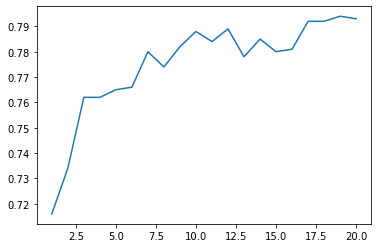

In [6]:
# аккуратно, не меняйте random_state
X, y = make_moons(n_samples=1000, noise=0.5, random_state=10)
test_score = train_grid_search(X, y)

# небольшая проверка: если не выдалась ошибка, то можете продолжать
assert (type(test_score) == np.ndarray), 'Переменная test_score должна иметь тип np.array()'
assert (len(test_score) == 20), 'Переменная test_score должна иметь 20 значений (по 1 для каждого кол-ва соседей)'

from matplotlib import pyplot as plt
plt.plot(np.arange(1, 21), test_score)

# проверяться будет переменная ```test_score```

In [7]:
# проверка номер 1, просто запустите ячейку

# your code here


In [8]:
# проверка номер 2, запускайте


## Задание 3

Загрузим данные:

In [9]:
!pip install python-mnist

You should consider upgrading via the '/opt/conda/bin/python3 -m pip install --upgrade pip' command.


In [10]:
from mnist import MNIST
from matplotlib import pyplot as plt
import numpy as np
mndata = MNIST('', gz=True)
images, labels = mndata.load_training()

# Далее мы берем только 5000 картинок и меток, чтобы не ждать обучения слишком долго:
images, labels = np.array(images)[:5000, :], np.array(labels)[:5000]

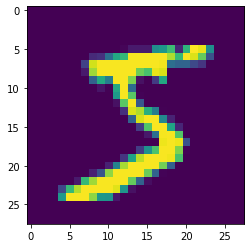

In [11]:
# Так вы можете посмотреть на данные. Например, это картинка номер 0. Можете посмотреть на любую другую!
plt.imshow(images[0].reshape(28, 28))
plt.show()

В этом задании вы будете работать с классическим датасетом MNIST. Код выше загрузил данные в переменные images и labels. Обучите knn с 30 ближайшими соседями. Предварительно разбейте выборку на train и test в соотношении 80/20 и ```random_state=10```. Какой `accuracy` вы получаете на тестовой выборке? Ответ округлите до 3 знаков после запятой.

In [13]:
x_train, x_test, y_train, y_test = train_test_split(images, labels, test_size=.2, random_state=10)
model = KNeighborsClassifier(n_neighbors=30)
model.fit(x_train, y_train)
accuracy = accuracy_score(y_test, model.predict(x_test))

# your code here


In [14]:
# Небольшая проверка для себя
import hashlib

assert hashlib.sha256(str(accuracy).encode()).hexdigest() == 'c29699d04c899bb3ddb5bd406ee08397c32b1e1c5c7a8b024f95d815b9556394'

In [15]:
# проверка, просто запустите ячейку


# Задание 4 (неоцениваемое)

Найдите примеры, которые были классифицированы не правильно. Найдите и визуализируйте 5 соседей неправильных предсказаний у любого ошибочного примера. Найти соседей точки можно с помощью метода kneighbors.  Почему они были классифицированы неправильно?

In [16]:
# your code here